# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [80]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [81]:
print(X_train.shape)

(39209, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [82]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train).union(set(y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

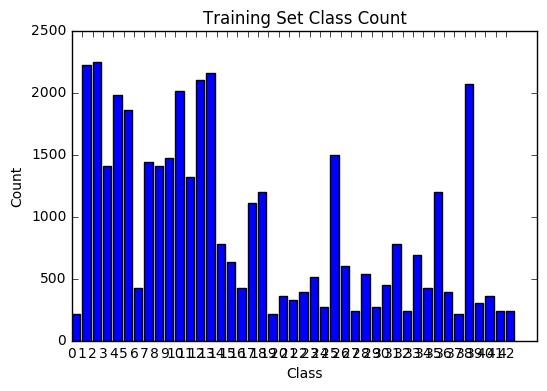

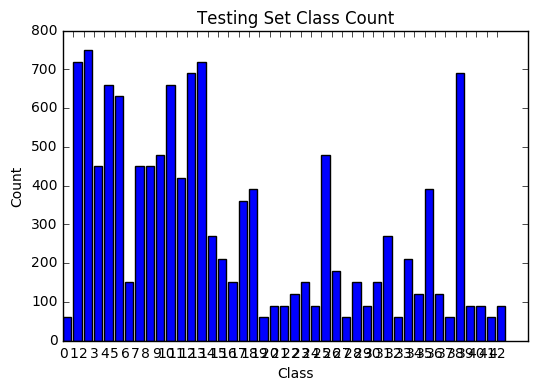

In [61]:
# Data exploration visualization
import matplotlib.pyplot as plt
%matplotlib inline

# count number of each class in training set
train_class_count = {}
for n in y_train:
    val = train_class_count[n] + 1 if n in train_class_count else 1
    train_class_count[n] = val

# count number of each class in testing set
test_class_count = {}
for n in y_test:
    val = test_class_count[n] + 1 if n in test_class_count else 1
    test_class_count[n] = val

plt.bar(range(len(train_class_count)), train_class_count.values())
plt.xticks(range(len(train_class_count)), train_class_count.keys())
plt.title('Training Set Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.bar(range(len(test_class_count)), test_class_count.values())
plt.xticks(range(len(test_class_count)), test_class_count.keys())
plt.title('Testing Set Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The two plots above are nearly identical, which is good as there are no classes in the testing that are not in the training set and we can adequately train and test each class. The primary difference is that the class counts for the training set are about three times larger than their respective class counts for the testing set. This is expected as about .25 of the total dataset is reserved for testing (75 / 25 = 3). 

In [62]:
def plot_images(image_indices, X, y, grayscale=False):
    for i in range(len(image_indices)):
        plt.figure()
        plt.title("Class " + str(y[image_indices[i]]))
        if not grayscale:
            plt.imshow(X[image_indices[i]])
        else:
            plt.imshow(X[image_indices[i]], cmap='gray')

/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


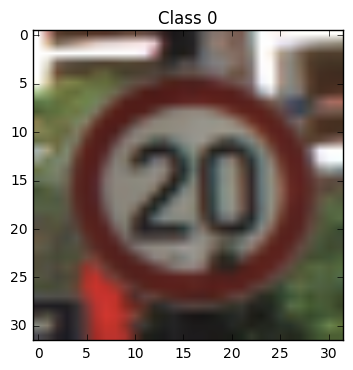

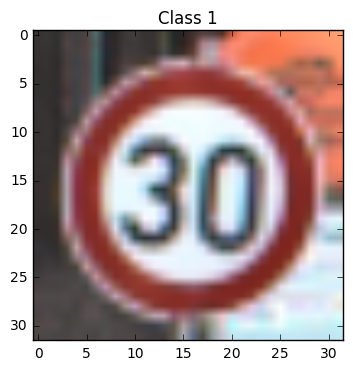

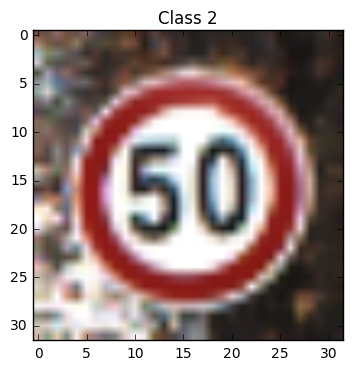

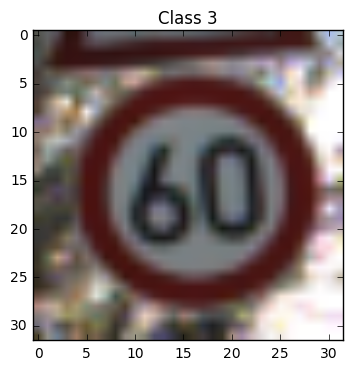

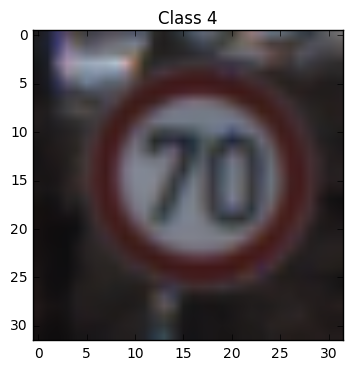

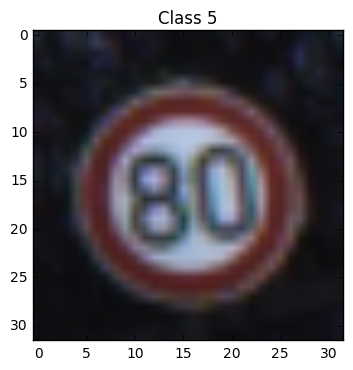

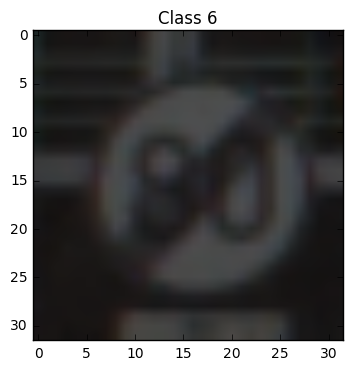

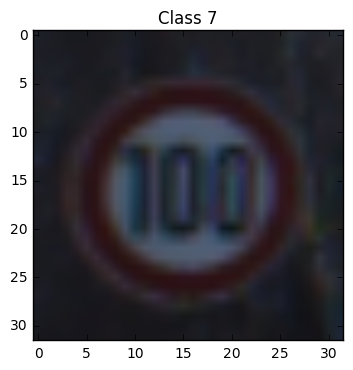

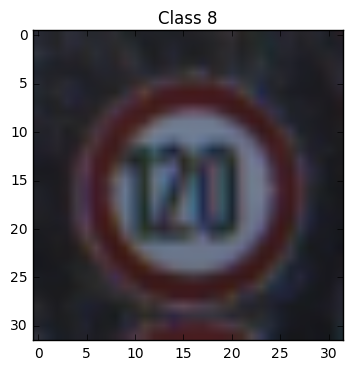

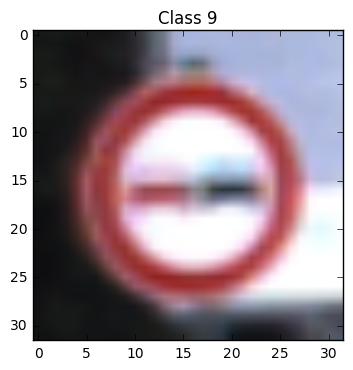

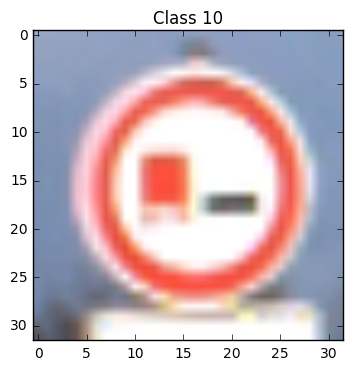

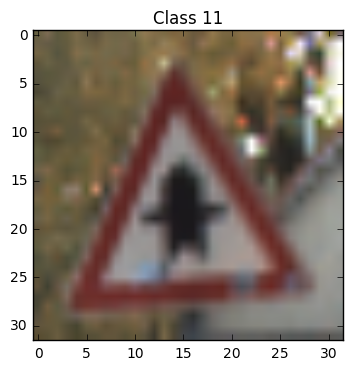

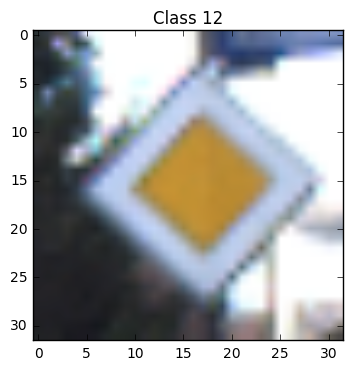

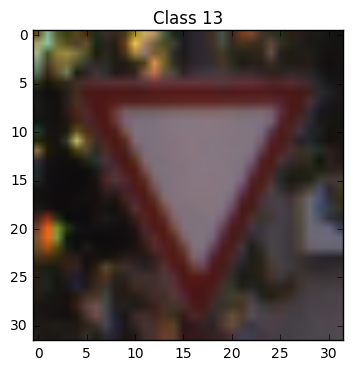

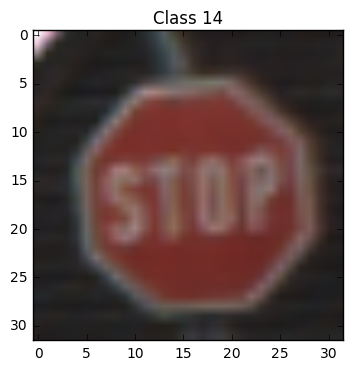

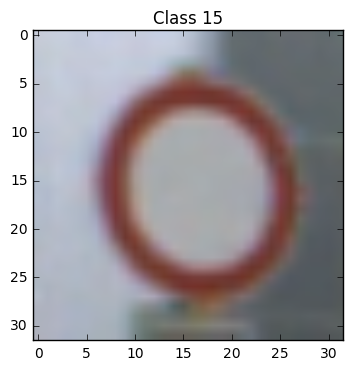

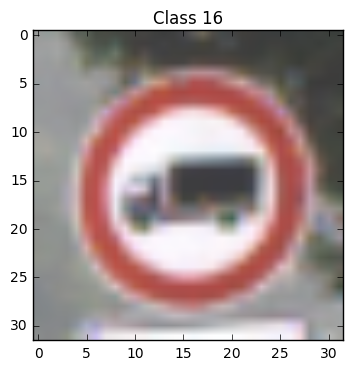

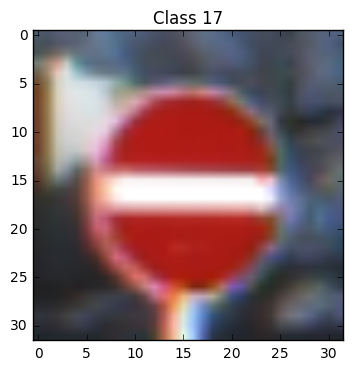

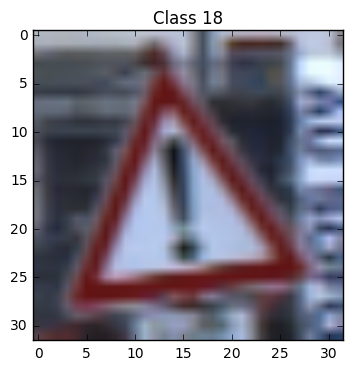

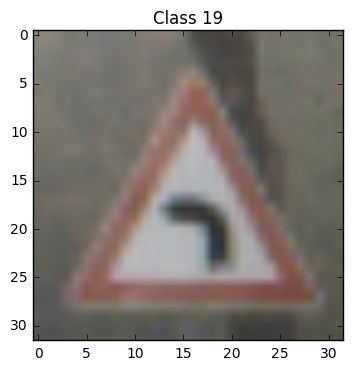

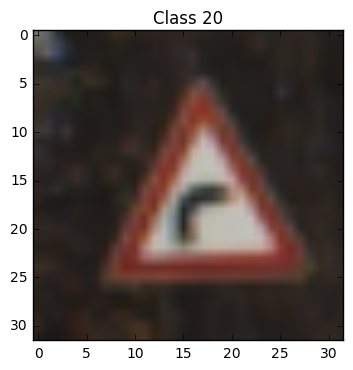

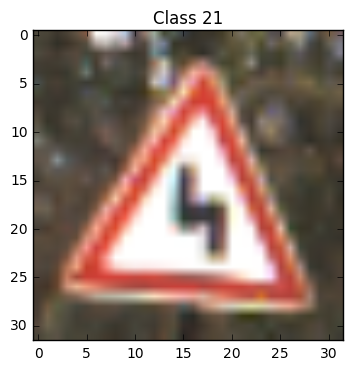

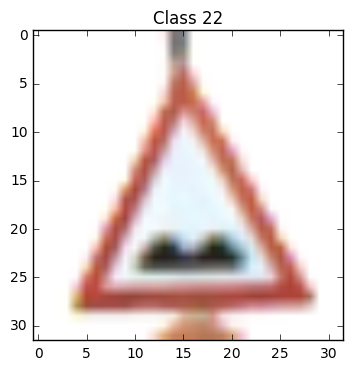

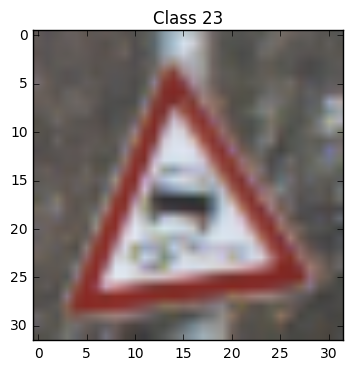

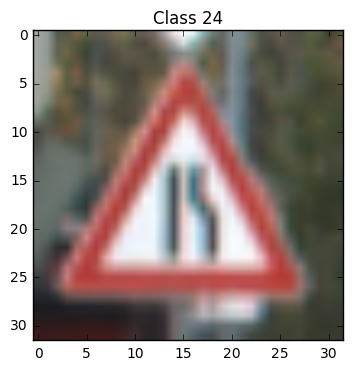

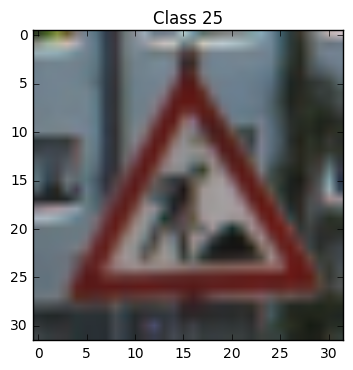

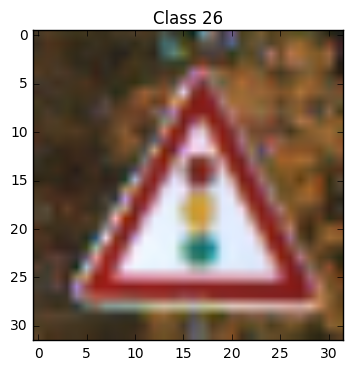

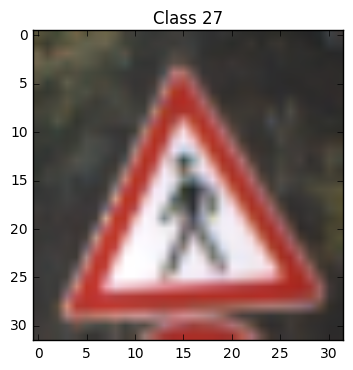

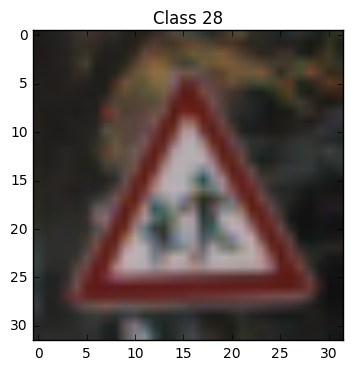

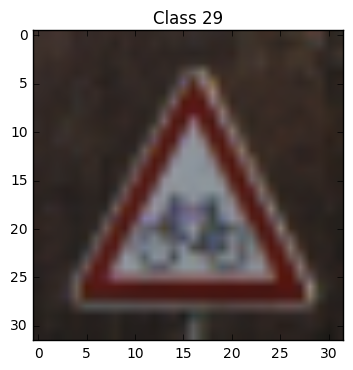

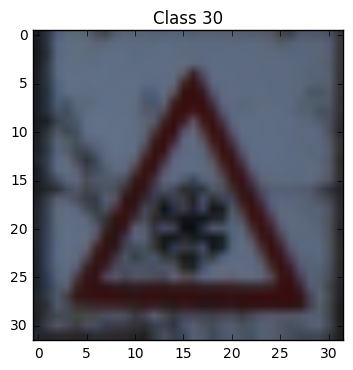

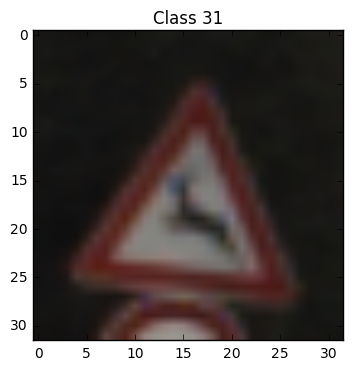

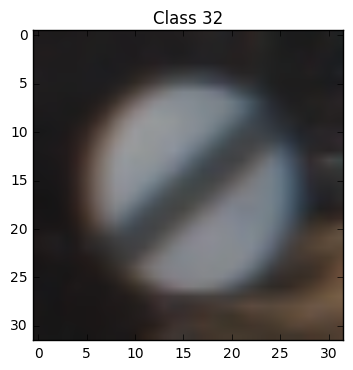

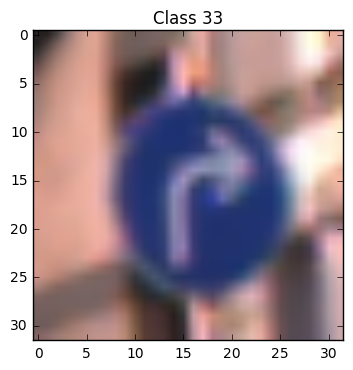

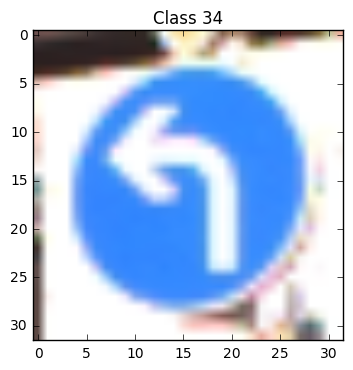

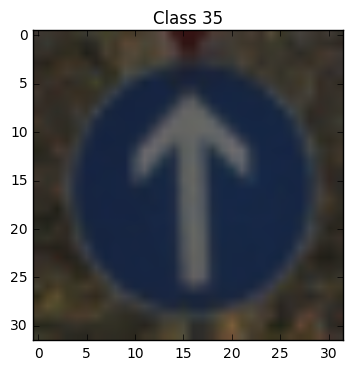

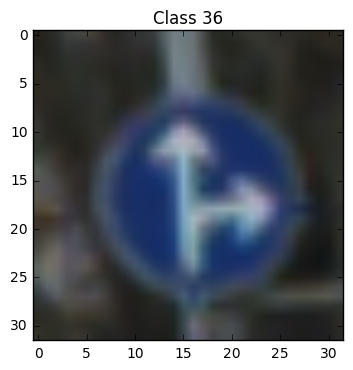

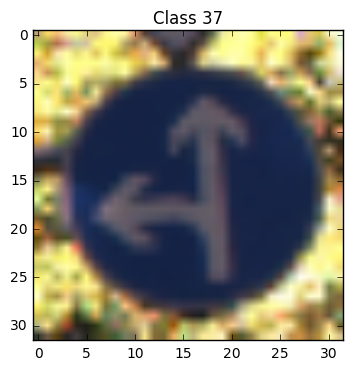

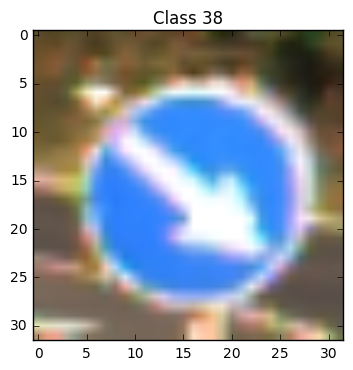

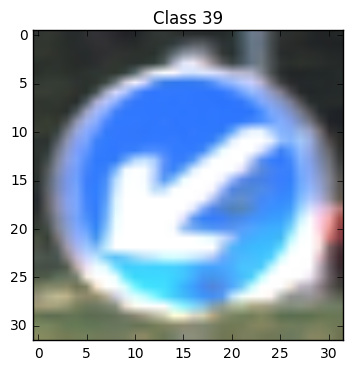

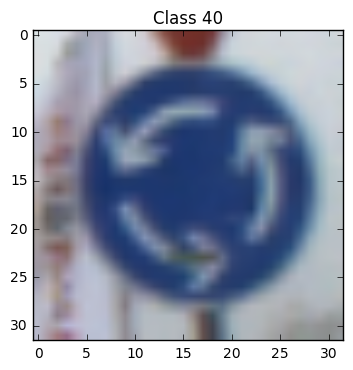

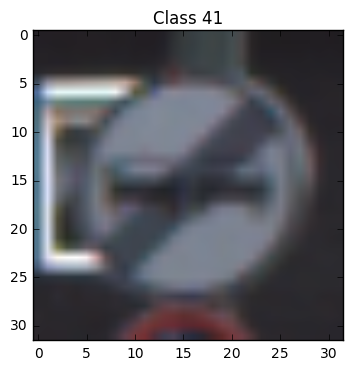

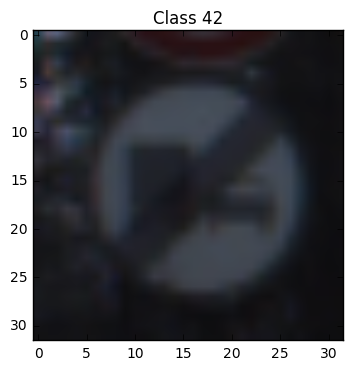

In [63]:
# Plot one image per class

clear_image_indices = [200, 2000, 4400, 5600, 8000, 9500, 10340, 11600, 13100, 14400, 16400, 17000,
                        19100, 20300, 23000, 23500, 23710, 24530, 26300, 26450, 26780, 27200, 27500,
                        28010, 28270, 29000, 30015, 30650, 31004, 31520, 31700, 32500, 32900, 33600,
                        33800, 35000, 35700, 35960, 36700, 38300, 38600, 38780, 39020]

plot_images(clear_image_indices, X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_  

**Answer:**  

Initially, I preprocessed the images with Gaussian Blur and Canny Edge Detection, but the edge detection algorithm was not as clean as I would have liked. For example, the numbers on the speed limit signs were not readible at all despite the various parameters I tried. I thought this was a good idea because I could remove the background noise such as trees, sky, and other irrelevant objects that are not the traffic sign.  

Next, I decided to only grayscale the images and normalize the features to 0 mean and unit variance for faster gradient descent convergence. Note that I settled with grayscale images because they performed better on the validation sets compared to the RGB images. Note that grayscale being superior to RGB for this dataset is verified by [this research paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).

In [64]:
### Generate additional data
### and split the data into training/validation/testing sets here.

# flip these vertically
horizontal_symmetric_classes = set([12, 15, 17])
# flip these horizontally
vertical_symmetric_classes = set([11, 12, 13, 15, 17, 18, 19, 20, 22, 26, 30, 33, 34, 35, 36, 37, 38, 39])

# class [key] flipped horizontally is class [value]
class_vertical_symmetry = {19: 20, 20: 19, 33: 34, 34: 33, 36: 37, 37: 36, 38: 39, 39: 38}

Number of synthesized examples: 15809


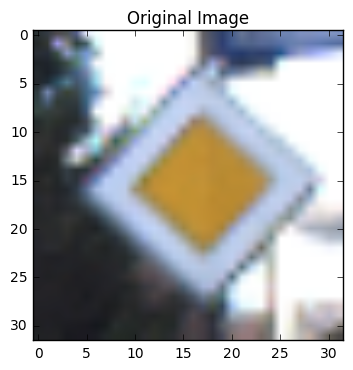

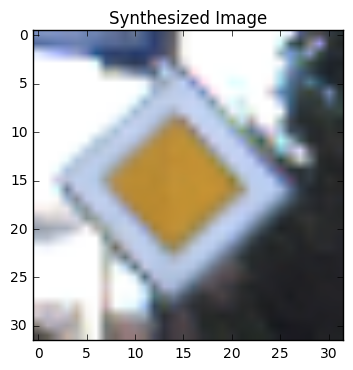

In [65]:
# synthesize vertically symmetric images
import numpy as np

s = set()
for i in range(X_train.shape[0]):
    if y_train[i] in vertical_symmetric_classes:
        s.add(i)

X_train_syn = np.zeros((len(s), X_train.shape[1], X_train.shape[2], X_train.shape[3]), dtype=np.uint8)
y_train_syn = np.zeros((len(s)))

example_i = example_j = example_m = example_n = -1

for j, i in enumerate(s):
    if example_j == -1 and i == 19100:
        example_i = i
        example_j = j
    X_train_syn[j] = np.fliplr(X_train[i])
    y_train_syn[j] = class_vertical_symmetry[y_train[i]] if y_train[i] in class_vertical_symmetry else y_train[i]
    if example_m == -1 and i == 35960:
        example_m = i
        example_n = j
    j += 1
    
# plot example
plt.figure()
plt.title("Original Image")
plt.imshow(X_train[example_i])
plt.figure()
plt.title("Synthesized Image")
plt.imshow(X_train_syn[example_j])

print("Number of synthesized examples: " + str(len(s)))

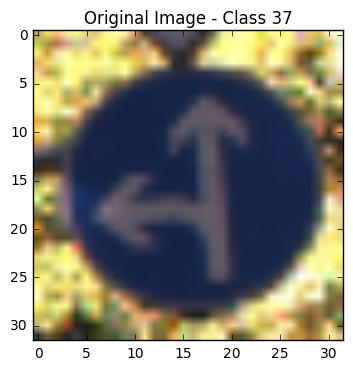

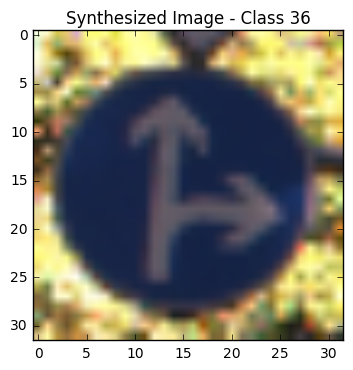

In [66]:
# Example of one class image flipped horizontally to synthesize an image of another class

plt.figure()
plt.title("Original Image - Class 37")
plt.imshow(X_train[example_m])
plt.figure()
plt.title("Synthesized Image - Class 36")
plt.imshow(X_train_syn[example_n])

In [67]:
# merge with original data set
X_train = np.concatenate((X_train, X_train_syn))
y_train = np.concatenate((y_train, y_train_syn))

Number of synthesized examples: 7680


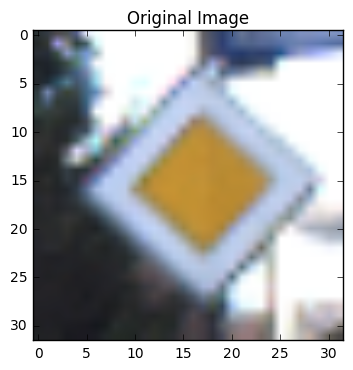

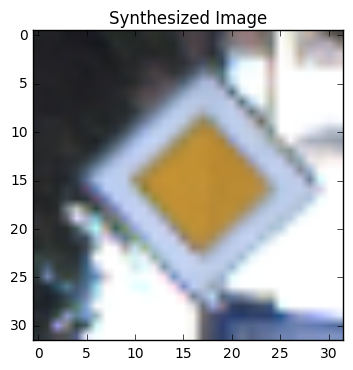

In [68]:
# synthesize horizontally symmetric images

s = set()
for i in range(X_train.shape[0]):
    if y_train[i] in horizontal_symmetric_classes:
        s.add(i)

X_train_syn = np.zeros((len(s), X_train.shape[1], X_train.shape[2], X_train.shape[3]), dtype=np.uint8)
y_train_syn = np.zeros((len(s)))

example_i = example_j = -1

for j, i in enumerate(s):
    if example_j == -1 and i == 19100:
        example_i = i
        example_j = j
    X_train_syn[j] = np.flipud(X_train[i])
    y_train_syn[j] = y_train[i]
    j += 1
    
# plot example
plt.figure()
plt.title("Original Image")
plt.imshow(X_train[example_i])
plt.figure()
plt.title("Synthesized Image")
plt.imshow(X_train_syn[example_j])

print("Number of synthesized examples: " + str(len(s)))

In [69]:
# merge with original data set
X_train = np.concatenate((X_train, X_train_syn))
y_train = np.concatenate((y_train, y_train_syn))

In [70]:
# number of synthesized training examples
print("Number of new training examples: " + str(X_train.shape[0] - n_train))
print("Number of total training examples: " + str(X_train.shape[0]))

Number of new training examples: 23489
Number of total training examples: 62698


In [71]:
# preprocess data
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler 

def grayscale(array_of_images):
    res = np.zeros(shape=(array_of_images.shape[0], 
                          array_of_images.shape[1],
                          array_of_images.shape[2]))
    for i in range(array_of_images.shape[0]):
        res[i] = cv2.cvtColor(array_of_images[i], cv2.COLOR_RGB2GRAY)
    return res.astype(np.uint8)

# requires gray scale
def normalize(X_train, X_test):
    X_train_scale = np.zeros(shape=(X_train.shape[0], 1024))
    X_test_scale = np.zeros(shape=(X_test.shape[0], 1024))

    for i in range(len(X_train)):
        X_train_scale[i] = X_train[i].flatten()
    for i in range(len(X_test)):
        X_test_scale[i] = X_test[i].flatten()

    scaler = StandardScaler().fit(X_train_scale)
    X_train_scale = scaler.transform(X_train_scale)
    X_test_scale = scaler.transform(X_test_scale)

    X_train_scale = X_train_scale.reshape(X_train.shape)
    X_test_scale = X_test_scale.reshape(X_test.shape)
    return X_train_scale, X_test_scale

def edge_detection(grayscale_images, kernel=3, low_threshold=50, high_threshold=150):
    res = np.copy(grayscale_images)
    for i in range(len(res)):
        # res[i] = cv2.GaussianBlur(res[i], (kernel, kernel), 0)
        res[i] = cv2.Canny(res[i], low_threshold, high_threshold)
    return res

/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


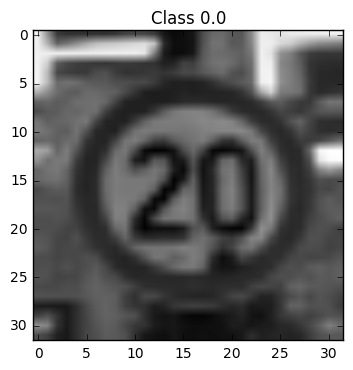

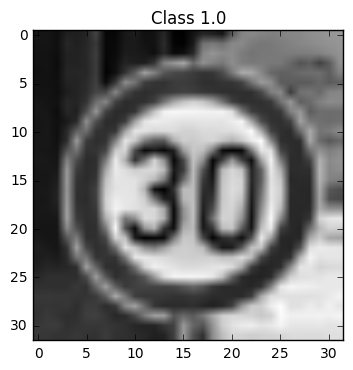

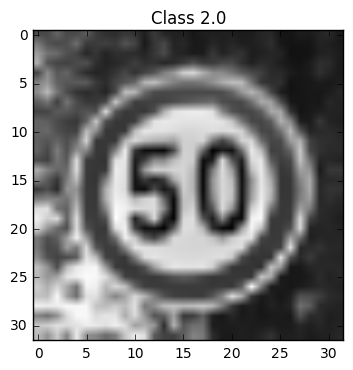

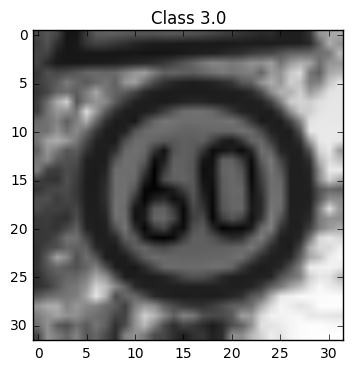

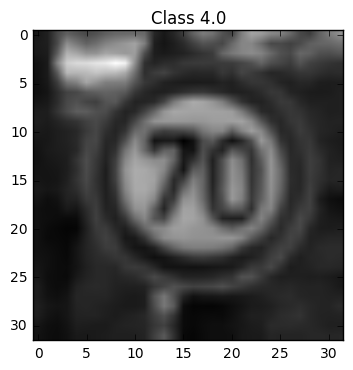

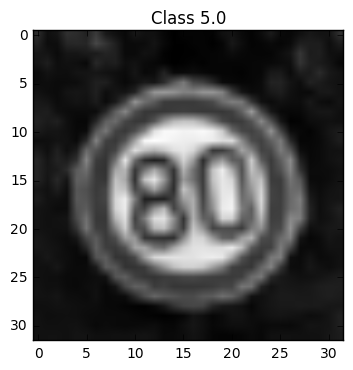

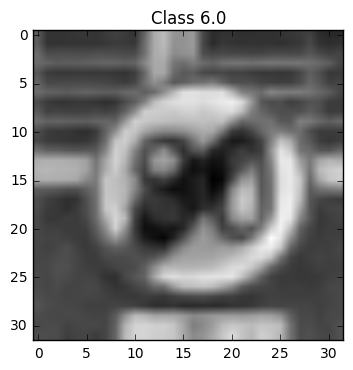

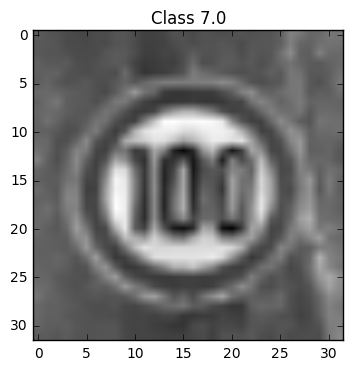

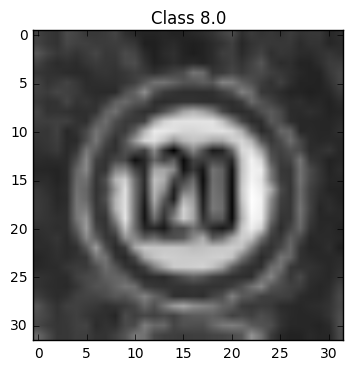

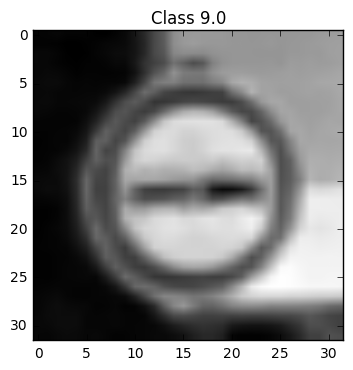

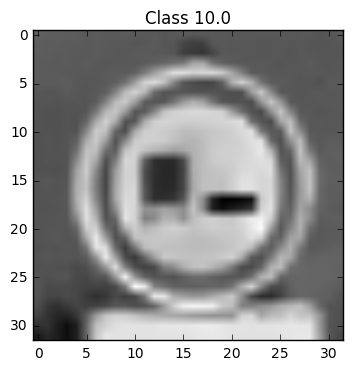

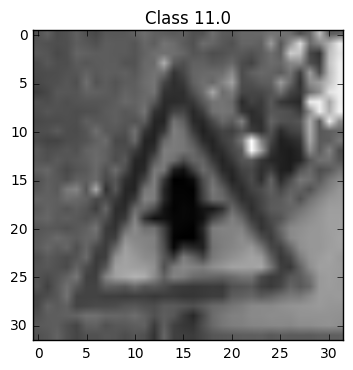

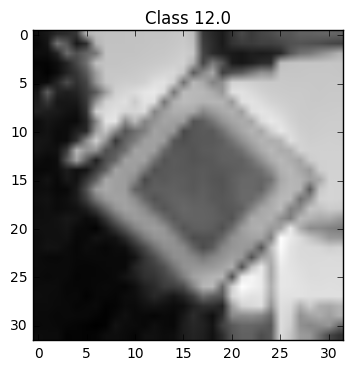

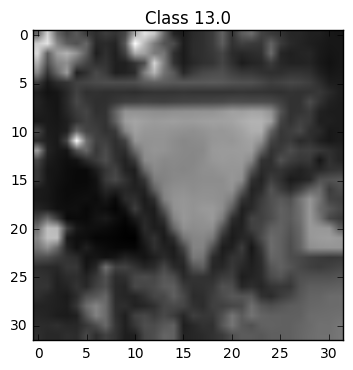

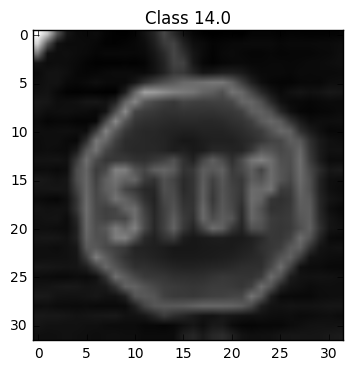

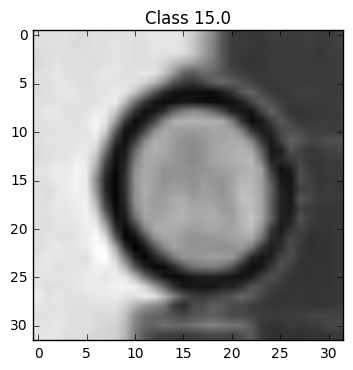

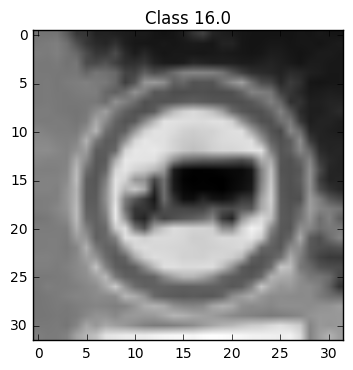

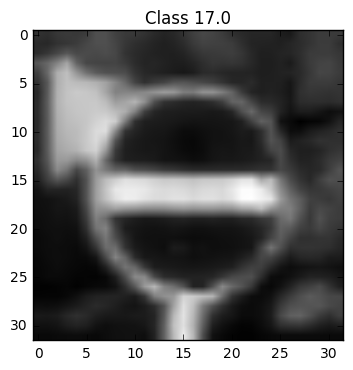

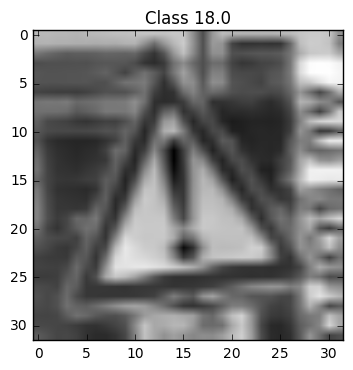

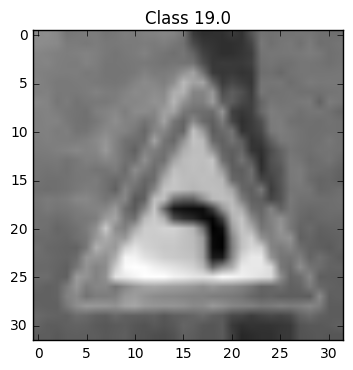

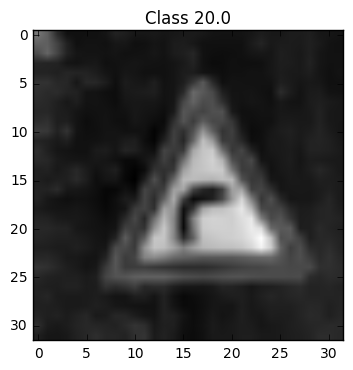

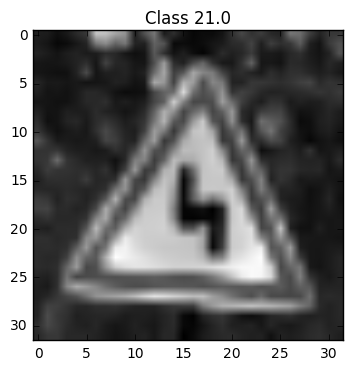

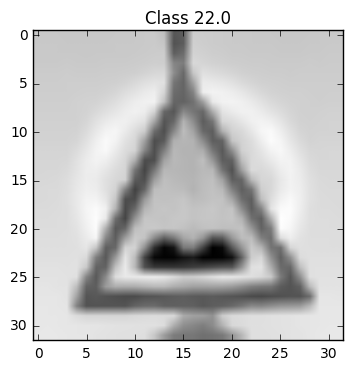

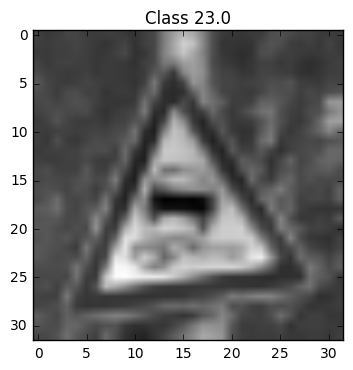

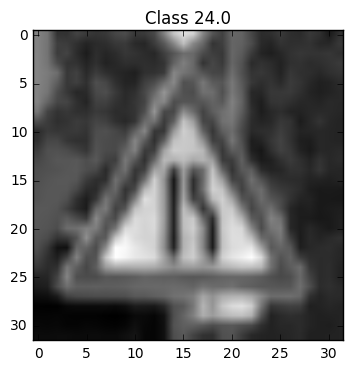

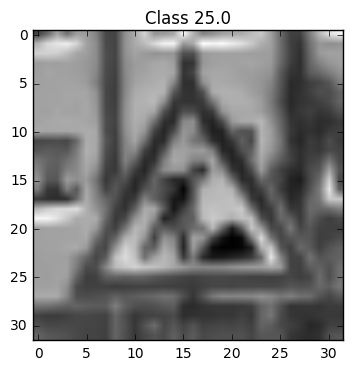

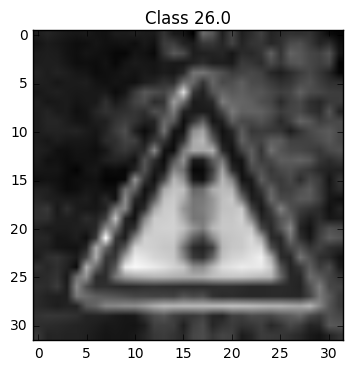

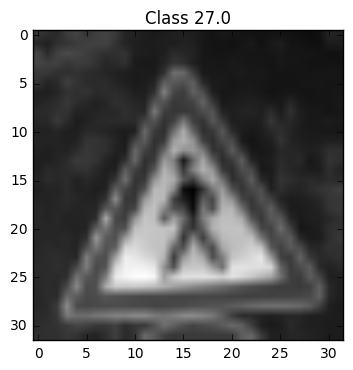

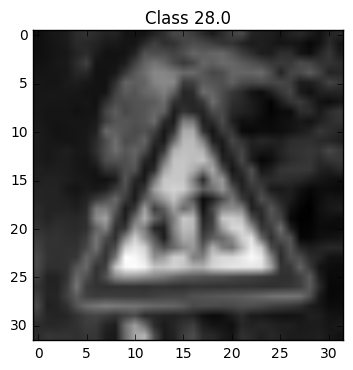

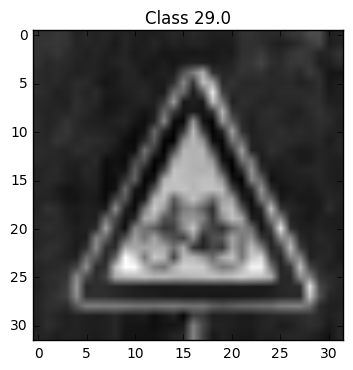

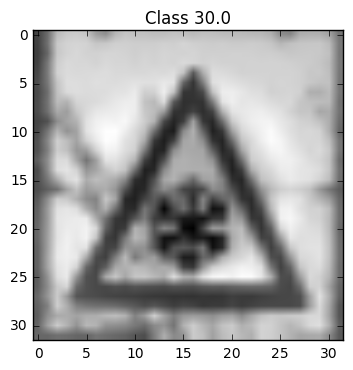

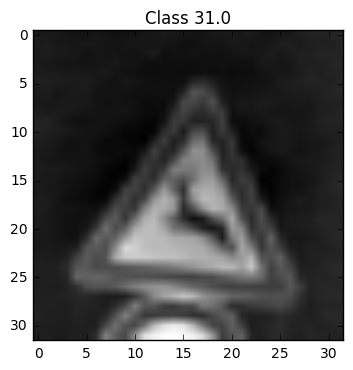

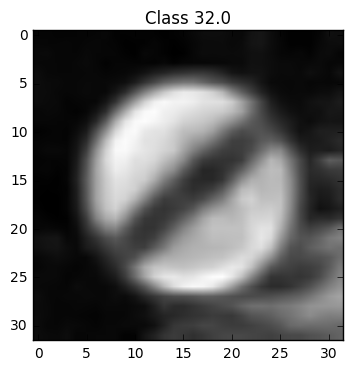

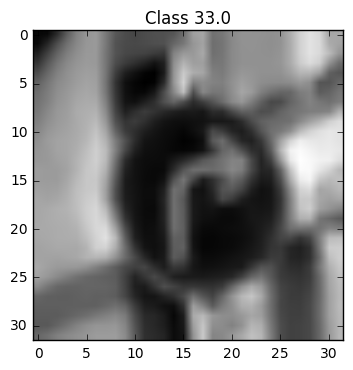

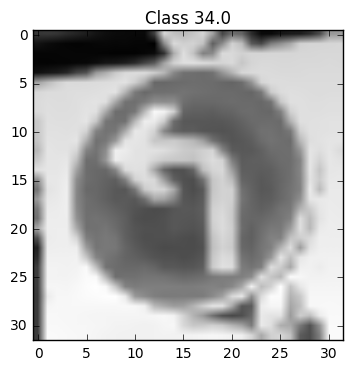

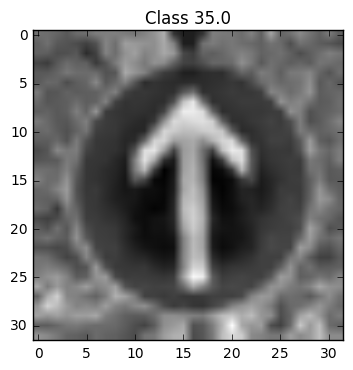

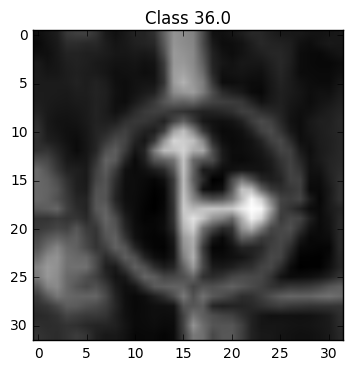

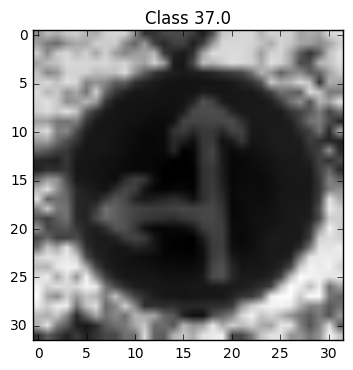

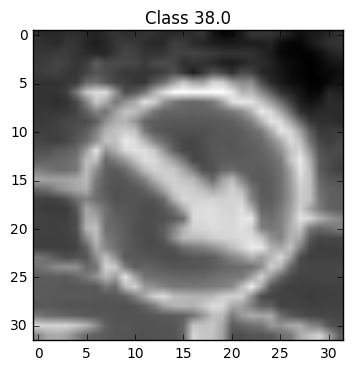

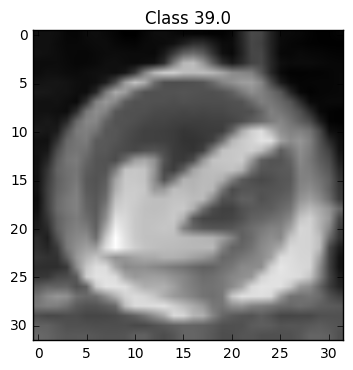

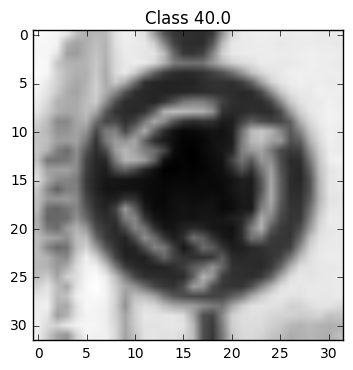

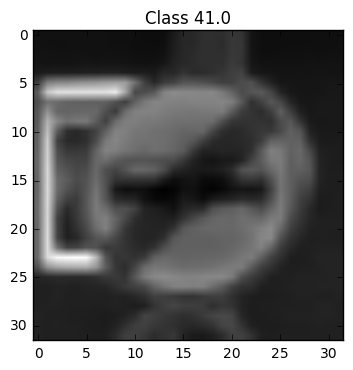

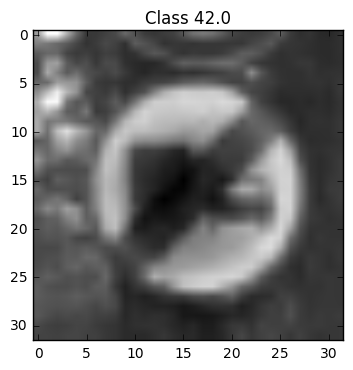

In [72]:
X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

X_train_gray, X_test_gray = normalize(X_train_gray, X_test_gray)

plot_images(clear_image_indices, X_train_gray, y_train, grayscale=True)

In [73]:
# create validation set
from sklearn.utils import shuffle

def cv_split(X_train, y_train, cv_size=0.35):
    d = np.zeros(n_classes, dtype=np.int)
    for i in range(y_train.shape[0]):
        d[y_train[i]] += 1
    
    size = 0
    for i in range(len(d)):
        d[i] = round(d[i] * cv_size)
        size += d[i]
    
    X = np.copy(X_train)
    y = np.copy(y_train)
    X, y = shuffle(X, y)
    
    shape = list(X_train.shape)
    shape[0] = X_train.shape[0] - size
    shape = tuple(shape)
    X_train_new = np.zeros(shape=shape)
    y_train_new = np.zeros(shape=(y_train.shape[0] - size))
    
    shape = list(X_train.shape)
    shape[0] = size
    shape = tuple(shape)
    X_cv = np.zeros(shape=shape)
    y_cv = np.zeros(shape=(size))
    
    train_count = cv_count = 0
    for i in range(X.shape[0]):
        if d[y[i]] != 0:
            d[y[i]] -= 1
            X_cv[cv_count] = X[i]
            y_cv[cv_count] = y[i]
            cv_count += 1
        else:
            X_train_new[train_count] = X[i]
            y_train_new[train_count] = y[i]
            train_count += 1
            
    return X_train_new, X_cv, y_train_new, y_cv

In [74]:
from sklearn.cross_validation import train_test_split

X_train_new, X_cv, y_train_new, y_cv = cv_split(X_train_gray, y_train)
# X_train_new, X_cv, y_train_new, y_cv = train_test_split(X_train_gray, y_train, test_size=0.50)

/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


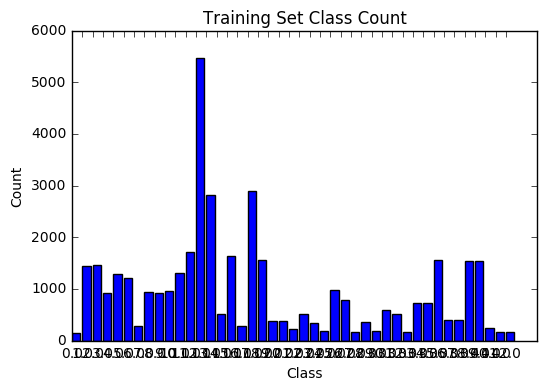

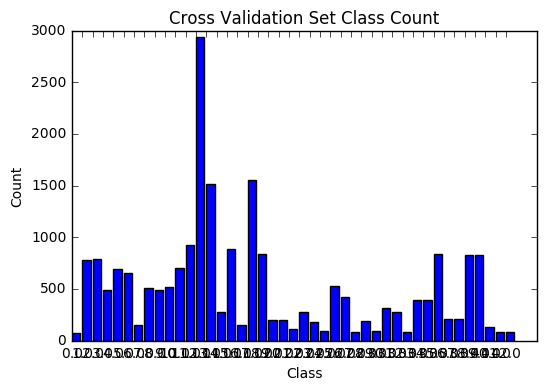

In [75]:
train_new_count = {}
for i in range(len(X_train_new)):
    key = y_train_new[i]
    val = train_new_count[y_train_new[i]] + 1 if y_train_new[i] in train_new_count else 1
    train_new_count[key] = val

cv_count = {}
for i in range(len(X_cv)):
    key = y_cv[i]
    val = cv_count[y_cv[i]] + 1 if y_cv[i] in cv_count else 1
    cv_count[key] = val

plt.bar(range(len(train_new_count)), train_new_count.values())
plt.xticks(range(len(train_new_count)), train_new_count.keys())
plt.title('Training Set Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.bar(range(len(cv_count)), cv_count.values())
plt.xticks(range(len(cv_count)), cv_count.keys())
plt.title('Cross Validation Set Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  

Data synthesis is a useful step because more training data leads to better test results.

As we can see from the plotted images above, some traffic signs are symmetrical along their horizontal or vertical axis. With this insight, extra images can be synthesized by flipping these images along their symmetrical axis. For example, Class 20 can be flipped horizontally, and Class 17 can be flipped both horizontally and vertically. Also, interestingly, some traffic signs flipped horizontally turn into other traffic signs. For example, Class 19 flipped horizontally turns into Class 20, and vice versa.  

These images were synthesized and added to X_train and y_train (provided in the pickled file in the first section). The number of training examples increased from 39209 to 62698, which is a 59.9% increase.  

After data synthesis, a cross-validation set with 35% of the training set was created. The cross-validation set was randomly sampled and has the same distribution as the training set (plotted above). Note that the cross validation set is important because it is validated during training to prevent overfitting the training set; the number of training epochs is optimal when the validation accuracy is the highest. Also, without the validation set, using the test set to find the optimal parameters for the training set may cause us to overfit the testing set which is bad becuase we would not know how well our model actually generalizes if we have used all of our data.

In [76]:
import tensorflow as tf

In [77]:
### Define your architecture here.

from tensorflow.contrib.layers import flatten

def LeNet(x, mu=0, sigma=0.1):
    x = tf.reshape(x, (-1, 32, 32, 1))

    # Convolution Layer 1. Input = 32x32x1. Output = 28x28x6.
    # (height, width, input_depth, output_depth)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation 1.
    conv1 = tf.nn.relu(conv1)

    # Pooling Layer 1. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolution Layer 2. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation 2.
    conv2 = tf.nn.relu(conv2)

    # Pooling Layer 2. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten Layer.
    fc1 = flatten(conv2)
    fc1_shape = (fc1.get_shape().as_list()[-1], 120)

    # Fully Connected Layer 1. Input = 5x5x16. Output = 120.
    fc1_W     = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean=mu, stddev=sigma))
    fc1_b     = tf.Variable(tf.zeros(120))
    fc1       = tf.matmul(fc1, fc1_W) + fc1_b

    # Activation 3.
    fc1 = tf.nn.relu(fc1)

    # Fully Connected Layer 2. Input = 120. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean=mu, stddev=sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b

    return logits

In [78]:
# x = tf.placeholder(tf.float32, (None, 32, 32, 3))
x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [21]:
learning_rate = 0.001

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
def evaluate(X_data, y_data, batch_size=-1):
    X_data, y_data = shuffle(X_data, y_data)
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    if batch_size == -1:
        batch_size = int(round(len(X_data) / 50))
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        loss, accuracy =  sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._  

**Answer:**  

The final architecture is the following LeNet-5 architecture:  

**Convolutional Layer 1.** Output shape is 28x28x6.

**Relu Activation 1.**

**Pooling Layer 1.** Output shape is 14x14x6.

**Convolutional Layer 2.** Output shape is 10x10x16.

**Relu Activation 2.**

**Pooling Layer 2.** Output shape is 5x5x16.

**Flatten Layer.** 

**Fully Connected Layer 1.** Number of outputs is 120

**Relu Activation 3.**

**Fully Connected Layer 2 (Logits).** Number of outputs is 43.

In [23]:
### Train your model here.
### Feel free to use as many code cells as needed.

def train_model(X_train, y_train, X_cv=None, y_cv=None, epochs=100):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("Training...")
        print()
        num_examples = len(X_train)
        best_epoch = 0
        max_accuracy = 0.
        min_loss = float('inf')
        batch_size = int(len(X_train) / 50)
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                # print(batch_x.shape)
                loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            if X_cv is not None:
                validation_loss, validation_accuracy = evaluate(X_cv, y_cv)
                print("EPOCH {} ...".format(i + 1))
                print("Validation Loss     = {:.3f}".format(validation_loss))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                if validation_accuracy > max_accuracy:
                    best_epoch = i
                    max_accuracy = validation_accuracy
                    min_loss = min(min_loss, validation_loss)
                elif max_accuracy == validation_accuracy and validation_loss < min_loss:
                    best_epoch = i
                    min_loss = validation_loss
            else:
                print("EPOCH {} ...".format(i + 1))
            print()

        try:
            saver
        except NameError:
            saver = tf.train.Saver()
        saver.save(sess, 'lenet')
        print("Model saved")
        
        if X_cv is not None:
            return best_epoch

In [24]:
trials = 3
best_epochs = np.zeros(trials)
for i in range(trials):
    X_train_new, X_cv, y_train_new, y_cv = cv_split(X_train_gray, y_train)
    best_epochs[i] = train_model(X_train_new, y_train_new, X_cv, y_cv, epochs=300)
avg_best_epoch = int(round(np.mean(best_epochs)))

/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/aaroniglesias/anaconda3/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Training...

EPOCH 1 ...
Validation Loss     = 1.761
Validation Accuracy = 0.573

EPOCH 2 ...
Validation Loss     = 1.030
Validation Accuracy = 0.693

EPOCH 3 ...
Validation Loss     = 0.675
Validation Accuracy = 0.822

EPOCH 4 ...
Validation Loss     = 0.511
Validation Accuracy = 0.871

EPOCH 5 ...
Validation Loss     = 0.436
Validation Accuracy = 0.884

EPOCH 6 ...
Validation Loss     = 0.398
Validation Accuracy = 0.890

EPOCH 7 ...
Validation Loss     = 0.314
Validation Accuracy = 0.919

EPOCH 8 ...
Validation Loss     = 0.279
Validation Accuracy = 0.935

EPOCH 9 ...
Validation Loss     = 0.263
Validation Accuracy = 0.934

EPOCH 10 ...
Validation Loss     = 0.224
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Loss     = 0.204
Validation Accuracy = 0.951

EPOCH 12 ...
Validation Loss     = 0.191
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Loss     = 0.382
Validation Accuracy = 0.903

EPOCH 14 ...
Validation Loss     = 0.195
Validation Accuracy = 0.951

EPOCH 15 ...
Val

In [25]:
print(best_epochs)
print(avg_best_epoch)

[ 295.  283.  298.]
292


In [26]:
train_model(X_train_gray, y_train, epochs=avg_best_epoch)

Training...

EPOCH 1 ...

EPOCH 2 ...

EPOCH 3 ...

EPOCH 4 ...

EPOCH 5 ...

EPOCH 6 ...

EPOCH 7 ...

EPOCH 8 ...

EPOCH 9 ...

EPOCH 10 ...

EPOCH 11 ...

EPOCH 12 ...

EPOCH 13 ...

EPOCH 14 ...

EPOCH 15 ...

EPOCH 16 ...

EPOCH 17 ...

EPOCH 18 ...

EPOCH 19 ...

EPOCH 20 ...

EPOCH 21 ...

EPOCH 22 ...

EPOCH 23 ...

EPOCH 24 ...

EPOCH 25 ...

EPOCH 26 ...

EPOCH 27 ...

EPOCH 28 ...

EPOCH 29 ...

EPOCH 30 ...

EPOCH 31 ...

EPOCH 32 ...

EPOCH 33 ...

EPOCH 34 ...

EPOCH 35 ...

EPOCH 36 ...

EPOCH 37 ...

EPOCH 38 ...

EPOCH 39 ...

EPOCH 40 ...

EPOCH 41 ...

EPOCH 42 ...

EPOCH 43 ...

EPOCH 44 ...

EPOCH 45 ...

EPOCH 46 ...

EPOCH 47 ...

EPOCH 48 ...

EPOCH 49 ...

EPOCH 50 ...

EPOCH 51 ...

EPOCH 52 ...

EPOCH 53 ...

EPOCH 54 ...

EPOCH 55 ...

EPOCH 56 ...

EPOCH 57 ...

EPOCH 58 ...

EPOCH 59 ...

EPOCH 60 ...

EPOCH 61 ...

EPOCH 62 ...

EPOCH 63 ...

EPOCH 64 ...

EPOCH 65 ...

EPOCH 66 ...

EPOCH 67 ...

EPOCH 68 ...

EPOCH 69 ...

EPOCH 70 ...

EPOCH 71 ...

EP

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  

Optimizer:  
Adam Optimizer  

Batch Size:  
The batch size is the number of training examples divided by 50, which translates to 50 batches per epoch.

Epochs:  
The model was trained 3 times against different validation sets. The original training set was shuffled and split 65% / 35% into a new training set and validation set. During each training session, the optimal number of epochs was recorded and was determined by the number of epochs less than 300 that produced the highest accuracy on the validation set. These 3 optimal number of epochs were averaged, and the entire training set was trained on this average number of epochs.

Mu:  
0 . I found that initializing the weights to random values with 0 mean worked very well for breaking symmetry.

Sigma:  
0.1. A sigma value of 1 reduced the validation set accuracy by 10%, so I stuck with 0.1 as was used in our LeNet lab.

Learning Rate:  
0.001. I found that smaller learning rates always produced better results. After experimenting with 0.1 and 0.01, and I settled on 0.001 as it produced the best validation accuracy without taking too long to train.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**  

My solution is the LeNet-5 architecture convolutional neural network. This is suitable for this problem because LeNet-5 exhibits world-class performance on traffic sign recognition, as demonstrated in [this research paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) by Dr. Sermanet of New York University.  

Aside from the architecture, I know a convolutional neural network excels at image classification as it automatically learns shapes within images. For example, the first layer may detect lines, the second layer may detect more complex shapes such as circles and squares, and the latter layers may detect objects such as traffic signs.

Finding the values for the learning rate, mu, sigma, batch size, number of epochs, and effective preprocessing techniques was largely trial and error. I settled with the values recorded in the previous section as these generally led to the best validation performance.  

For batch size and number of epochs, I found that a low batch size and low number epochs performed the same as a high batch size and high number of epochs. After experimentation, I settled on 50 batches per epoch with the number of epochs calculated as described in the previous answer.  Also, I settled with grayscale images as they performed 2% better on average on the validation sets.  

For mu and sigma, 0 and 0.1 worked the best, respectively. For the learning rate, I found that smaller learning rates always produced better results. After experimenting with 0.1 and 0.01, and I settled on 0.001 as it produced the best validation accuracy without taking too long to train.  

For data preprocessing, I tried preprocessing the images with Gaussian Blur and Canny Edge Detection, but the edge detection algorithm was not as clean as I would have liked. For example, the numbers on the speed limit signs were not readible at all. So, I stuck with simply grayscaling the images and normalizing the features to 0 mean and unit variance for faster gradient descent convergence. Also, I found that data synthesis increased validation accuracy by 2% which makes sense because more training data leads to better test results.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_loss, test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss     = 1.085
Test Accuracy = 0.924


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**  

The images are plotted in the 4th cell below.  

Class 11: The background here is fairly clean. Nothing here makes classification difficult.  

Class 13: The background is split between black and white. There is noticable noise in the bottom-right corner.  

Class 14: There is quite a bit of noise in the background trees and sky, which can make classification difficult.  

Class 23: There is noise in the background trees, which can make classification difficult.  

Class 31: The bottom-right and bottom-left corners are black, which can make classification difficult.

In [28]:
# import images

img11 = cv2.imread('11.jpg', 0)
img13 = cv2.imread('13.jpg', 0)
img14 = cv2.imread('14.jpg', 0)
img23 = cv2.imread('23.jpg', 0)
img31 = cv2.imread('31.jpg', 0)

In [29]:
# populate test set

X_sign = np.zeros(shape=(5, 32, 32))
X_sign[0] = img11
X_sign[1] = img13
X_sign[2] = img14
X_sign[3] = img23
X_sign[4] = img31
y_sign = np.array([11, 13, 14, 23, 31])

In [30]:
# normalize images

X_train_gray, X_sign = normalize(X_train_gray, X_sign)

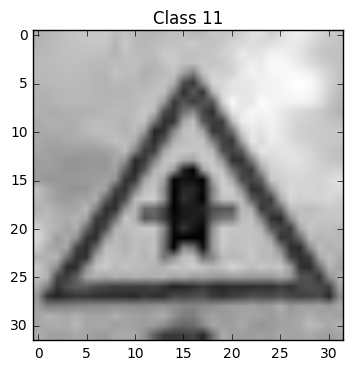

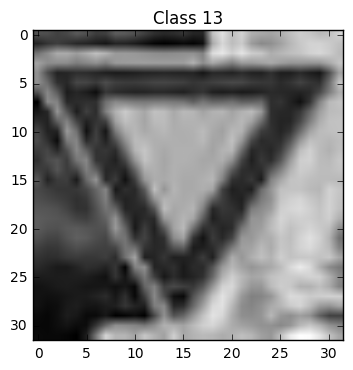

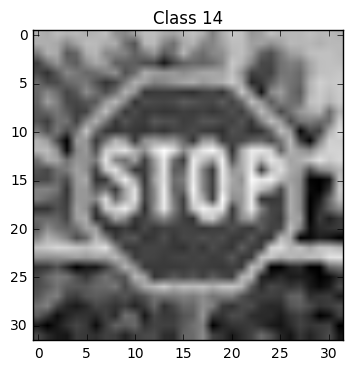

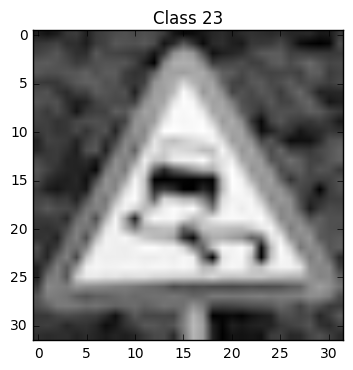

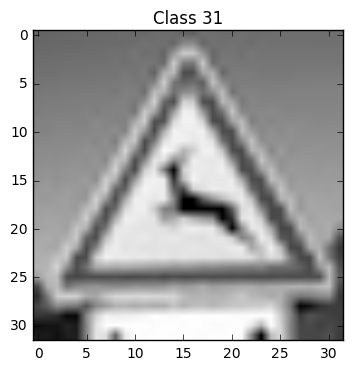

In [31]:
# plot 

plot_images([0, 1, 2, 3, 4], X_sign, y_sign, grayscale=True)

In [33]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_loss, test_accuracy = evaluate(X_sign, y_sign, batch_size=1)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss     = 188.312
Test Accuracy = 0.800


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**  

My model attained 92.4% test set accuracy, and 80% accuracy on the 5 imported images (shown in previous code cell). While this does not perform equally well, testing on several thousands of imported images may be a better representation of the model's effectiveness than 5 images.  

As shown in the second code cell below, my model misclassified the "slippery road" sign (class 23) as a "dangerous curve to the left" sign (class 19).

In [34]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_output = None
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    softmax_output = sess.run(softmax, feed_dict={x: X_sign})
print(softmax_output)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


In [38]:
actual_classes = [11, 13, 14, 23, 31]
predicted_classes = []
for softmax in softmax_output:
    for i in range(len(softmax)):
        if softmax[i] == 1:
            predicted_classes.append(i)
print("Actual Classes: ")
print(actual_classes)
print()
print("Predicted Classes: ")
print(predicted_classes)

Actual Classes: 
[11, 13, 14, 23, 31]

Predicted Classes: 
[11, 13, 14, 19, 31]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  

My model is 100% certain about its predicted classes: 11, 13 14, 19, 31. Hence, the correct class 23 does not appear in its top 3 predictions.

In [57]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    softmax = tf.nn.softmax(logits)
    softmax_output = sess.run(softmax, feed_dict={x: X_sign, y: y_sign})
    top_3_tensor = tf.nn.top_k(softmax, 3)
    top_3 = sess.run(top_3_tensor, feed_dict={x: X_sign, y: y_sign})
    print(top_3)

TopKV2(values=array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]], dtype=float32), indices=array([[11,  0,  1],
       [13,  0,  1],
       [14,  0,  1],
       [19,  0,  1],
       [31,  0,  1]], dtype=int32))


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.